In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv("Laptop-Price.csv")

In [3]:
df_copy = df.copy()

In [4]:
df_copy.drop("Unnamed: 16", axis=1, inplace=True)

In [8]:
df_copy.query("TypeName=='Notebook' and Inches<15.6")

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
32,HP,ProBook 430,Notebook,13.3,Full HD 1920x1080,8GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Intel,UHD Graphics 620,1103.00
41,Lenovo,IdeaPad 520S-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,8GB,No OS,Intel,Core i3 7130U,2.7GHz,256,0,0,0,Intel,HD Graphics 620,599.00
42,Asus,UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10),Notebook,14.0,Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,941.00
52,Acer,Aspire E5-475,Notebook,14.0,1366x768,8GB,Windows 10,Intel,Core i3 6006U,2GHz,0,1,0,0,Intel,HD Graphics 520,389.00
59,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,HD Graphics 620,860.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,Asus,UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10),Notebook,14.0,Full HD 1920x1080,4GB,Windows 10,Intel,Core i3 7100U,2.4GHz,256,0,0,0,Intel,HD Graphics 620,769.00
1100,Lenovo,ThinkPad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 7500U,2.7GHz,512,0,0,0,Intel,HD Graphics 620,1499.00
1105,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,4GB,Windows 7,Intel,Core i5 6200U,2.3GHz,256,0,0,0,Intel,HD Graphics 520,1099.99
1107,Dell,Latitude 5480,Notebook,14.0,1366x768,4GB,Windows 10,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,875.00


In [11]:
df_copy.query("TypeName=='Notebook' and Inches<15.6").groupby('Company')['Price_euros'].agg(['median', 'mean', 'max'])

,median,mean,max
Company,,,
Acer,636.0,640.200000,902.0
Asus,943.0,877.498750,1334.0
Dell,875.0,964.194706,1427.0
HP,1084.0,1101.152553,2229.0
Lenovo,1006.0,1097.296765,2620.0
Mediacom,265.0,265.000000,265.0
Toshiba,1211.5,1278.625000,1672.0


In [13]:
def convert_values(series):
    return series*100

In [14]:
convert_values(df_copy['Price_euros'])

0        57500.0
1        40000.0
2       149500.0
3        77000.0
4        39390.0
          ...   
1141     80599.0
1142     72032.0
1143     63800.0
1144    149900.0
1145     76400.0
Name: Price_euros, Length: 1146, dtype: float64

In [5]:
def get_ram(value):
    return int(value.split('G')[0])

def get_cpu_rate(value):
    return float(value.split('G')[0])

In [6]:
df_copy['Ram'] = df_copy['Ram'].apply(get_ram, convert_dtype=True)
df_copy['Cpu Rate'] = df_copy['Cpu Rate'].apply(get_cpu_rate, convert_dtype=True)
df_copy['SSD'] = df_copy['SSD'].apply(lambda x: 1000 if x==1 else x)
df_copy['HDD'] = df_copy['HDD'].apply(lambda x: 1000 if x==1 else x)
pattern = re.compile('\d+x\d+')
df_copy.insert(5, 'ScreenResolutionValue', value=[None for x in range(len(df_copy))])
df_copy['ScreenResolutionValue'] = df_copy['ScreenResolution'].apply(lambda x: pattern.findall(x)[0])

In [7]:
df_copy.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,ScreenResolutionValue,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,1920x1080,8,No OS,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,1366x768,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,1920x1080,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,0,0,Nvidia,GeForce MX150,1495.0


In [8]:
df_copy.sort_values(['Ram','Price_euros'], ascending=[True,False])

,Company,Product,TypeName,Inches,ScreenResolution,ScreenResolutionValue,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
776,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,1920x1080,4,Windows 10,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,1799.0
773,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,1920x1080,4,Windows 10,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,1700.0
969,HP,Elitebook 820,Netbook,12.5,1366x768,1366x768,4,Windows 7,Intel,Core i5 6200U,2.3,128,0,0,0,Intel,HD Graphics 520,1599.0
892,HP,Elitebook 840,Notebook,14.0,Full HD 1920x1080,1920x1080,4,Windows 10,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,1590.0
818,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,1920x1080,4,Windows 10,Intel,Core i5 6200U,2.3,0,500,0,0,Intel,HD Graphics 520,1579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,1920x1080,32,Windows 10,Intel,Core i7 7500U,2.7,512,0,0,0,Intel,HD Graphics 620,2799.0
570,Asus,ROG G701VI,Gaming,17.3,IPS Panel Full HD 1920x1080,1920x1080,32,Windows 10,Intel,Core i7 6820HK,2.7,512,0,0,0,Nvidia,GeForce GTX 1080,2799.0
506,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,1920x1080,32,Windows 10,Intel,Core i7 6820HK,2.7,256,1000,0,0,Nvidia,GeForce GTX 1070,2663.0
291,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,3840x2160,32,Windows 10,Intel,Core i7 7700HQ,2.8,1000,0,0,0,Nvidia,GeForce GTX 1050,2639.0


In [9]:
groups = df_copy[df_copy['TypeName']=="Gaming"].groupby('Company')['Ram']
groups = groups.agg(['median','max', 'min'])
print(groups['median'])

Company
Acer      12.0
Asus      16.0
Dell      16.0
HP        12.0
Lenovo     8.0
MSI       16.0
Razer     16.0
Name: median, dtype: float64


In [10]:
color_dict = {
        'Acer':                      'blue',
        'Asus':                   'darkblue',
        'Dell':                       'slateblue',
        'Lenovo':                       'magenta',
        'MSI':          'cyan',
        'Razer':          'black'
        }
print(color_dict.values())

dict_values(['blue', 'darkblue', 'slateblue', 'magenta', 'cyan', 'black'])


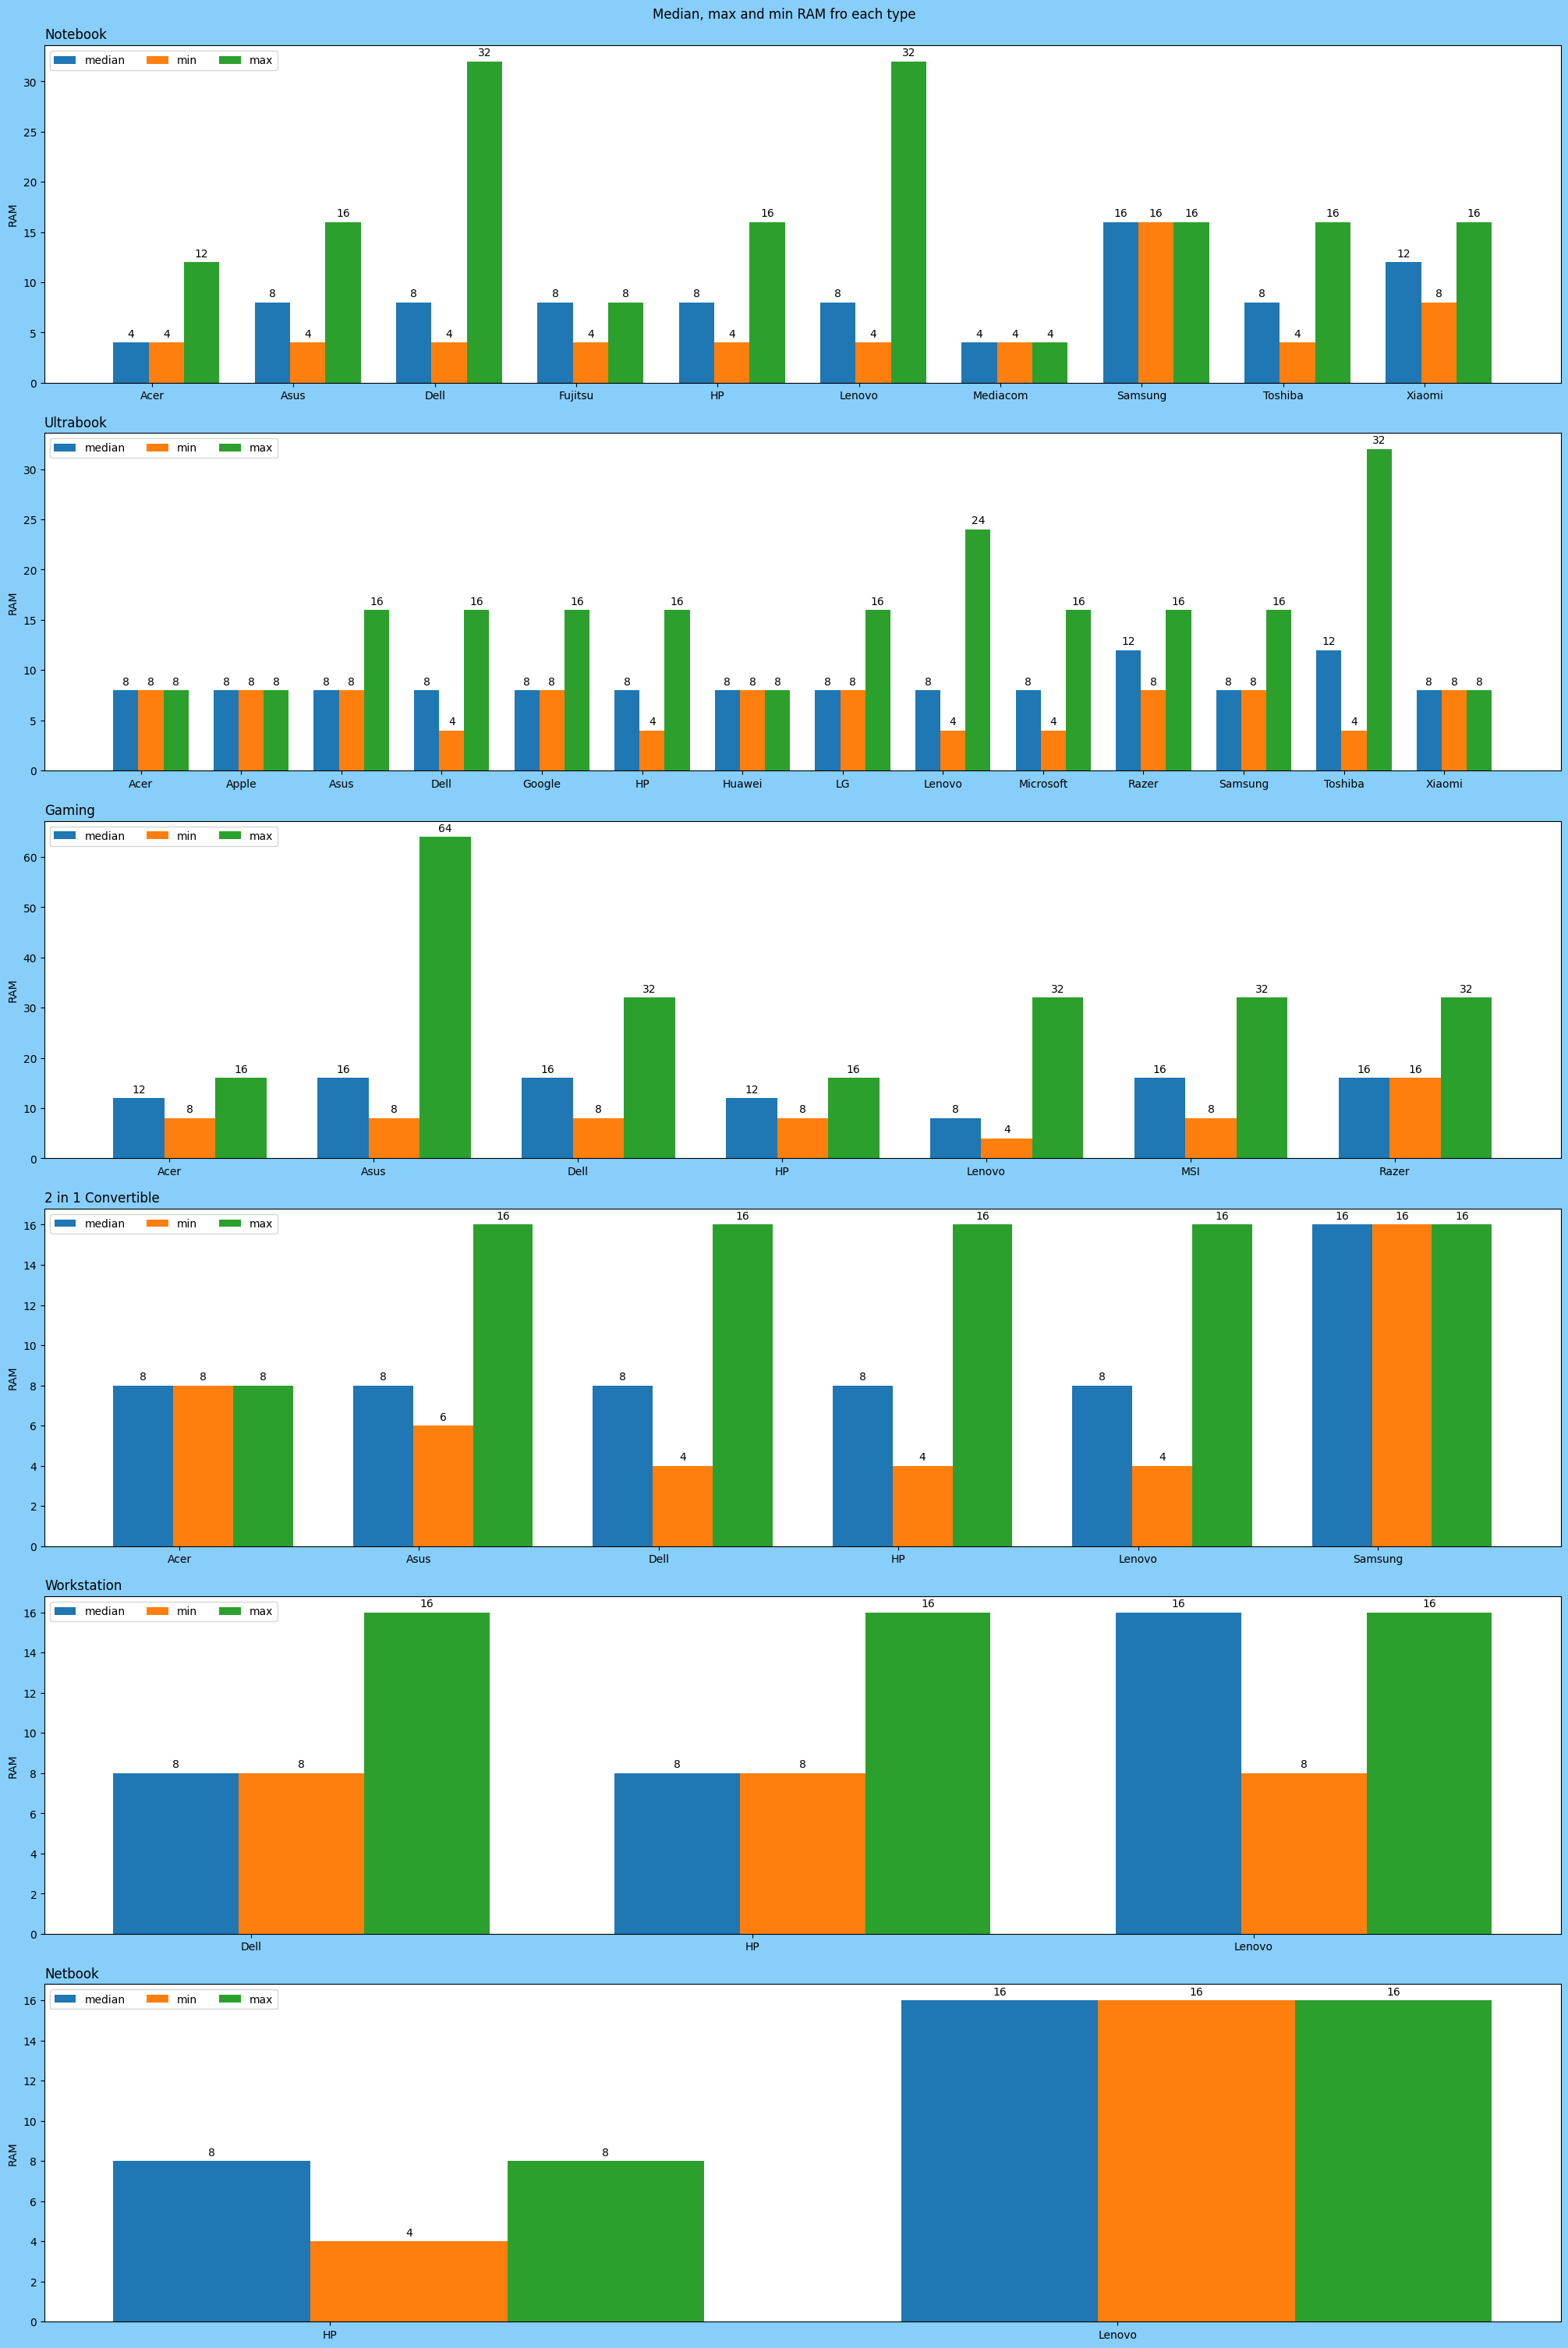

In [11]:
types = df_copy['TypeName'].unique()
companies = df_copy['Company'].unique()

fig = plt.figure(figsize=(20,30), facecolor='lightskyblue',
                 layout='constrained')
fig.suptitle('Median, max and min RAM fro each type')
sub_figures = fig.subfigures(len(types),1)
for type, sub_fig in zip(types, sub_figures):
    ax = sub_fig.add_subplot()
    ax.set_ylabel("RAM")
    ax.set_title(type, loc='left')
    
    groups = df_copy[df_copy['TypeName']==type].groupby('Company')['Ram']
    measure = ['median', 'min','max']
    groups = groups.agg(measure)
    
    x = np.arange(len(groups.index.to_list()))
    #x = np.arange(len(measure))
    width = 0.25
    multiplier = 0
    
    for mes in measure:
        offset = width*multiplier+0.1
        rects = ax.bar(x+offset, groups[mes], width, label=mes)
        ax.bar_label(rects, padding=3)
        multiplier+=1
 
    ax.set_xticks(x + width, groups.index.to_list())
    ax.legend(loc='upper left', ncols=3)

    
    

In [31]:
types = df_copy['TypeName'].unique()
companies = df_copy['Company'].unique()
df_filtered = df_copy[df_copy['TypeName']==types[0]]
print(df_filtered.groupby('Company')['Price_euros'])

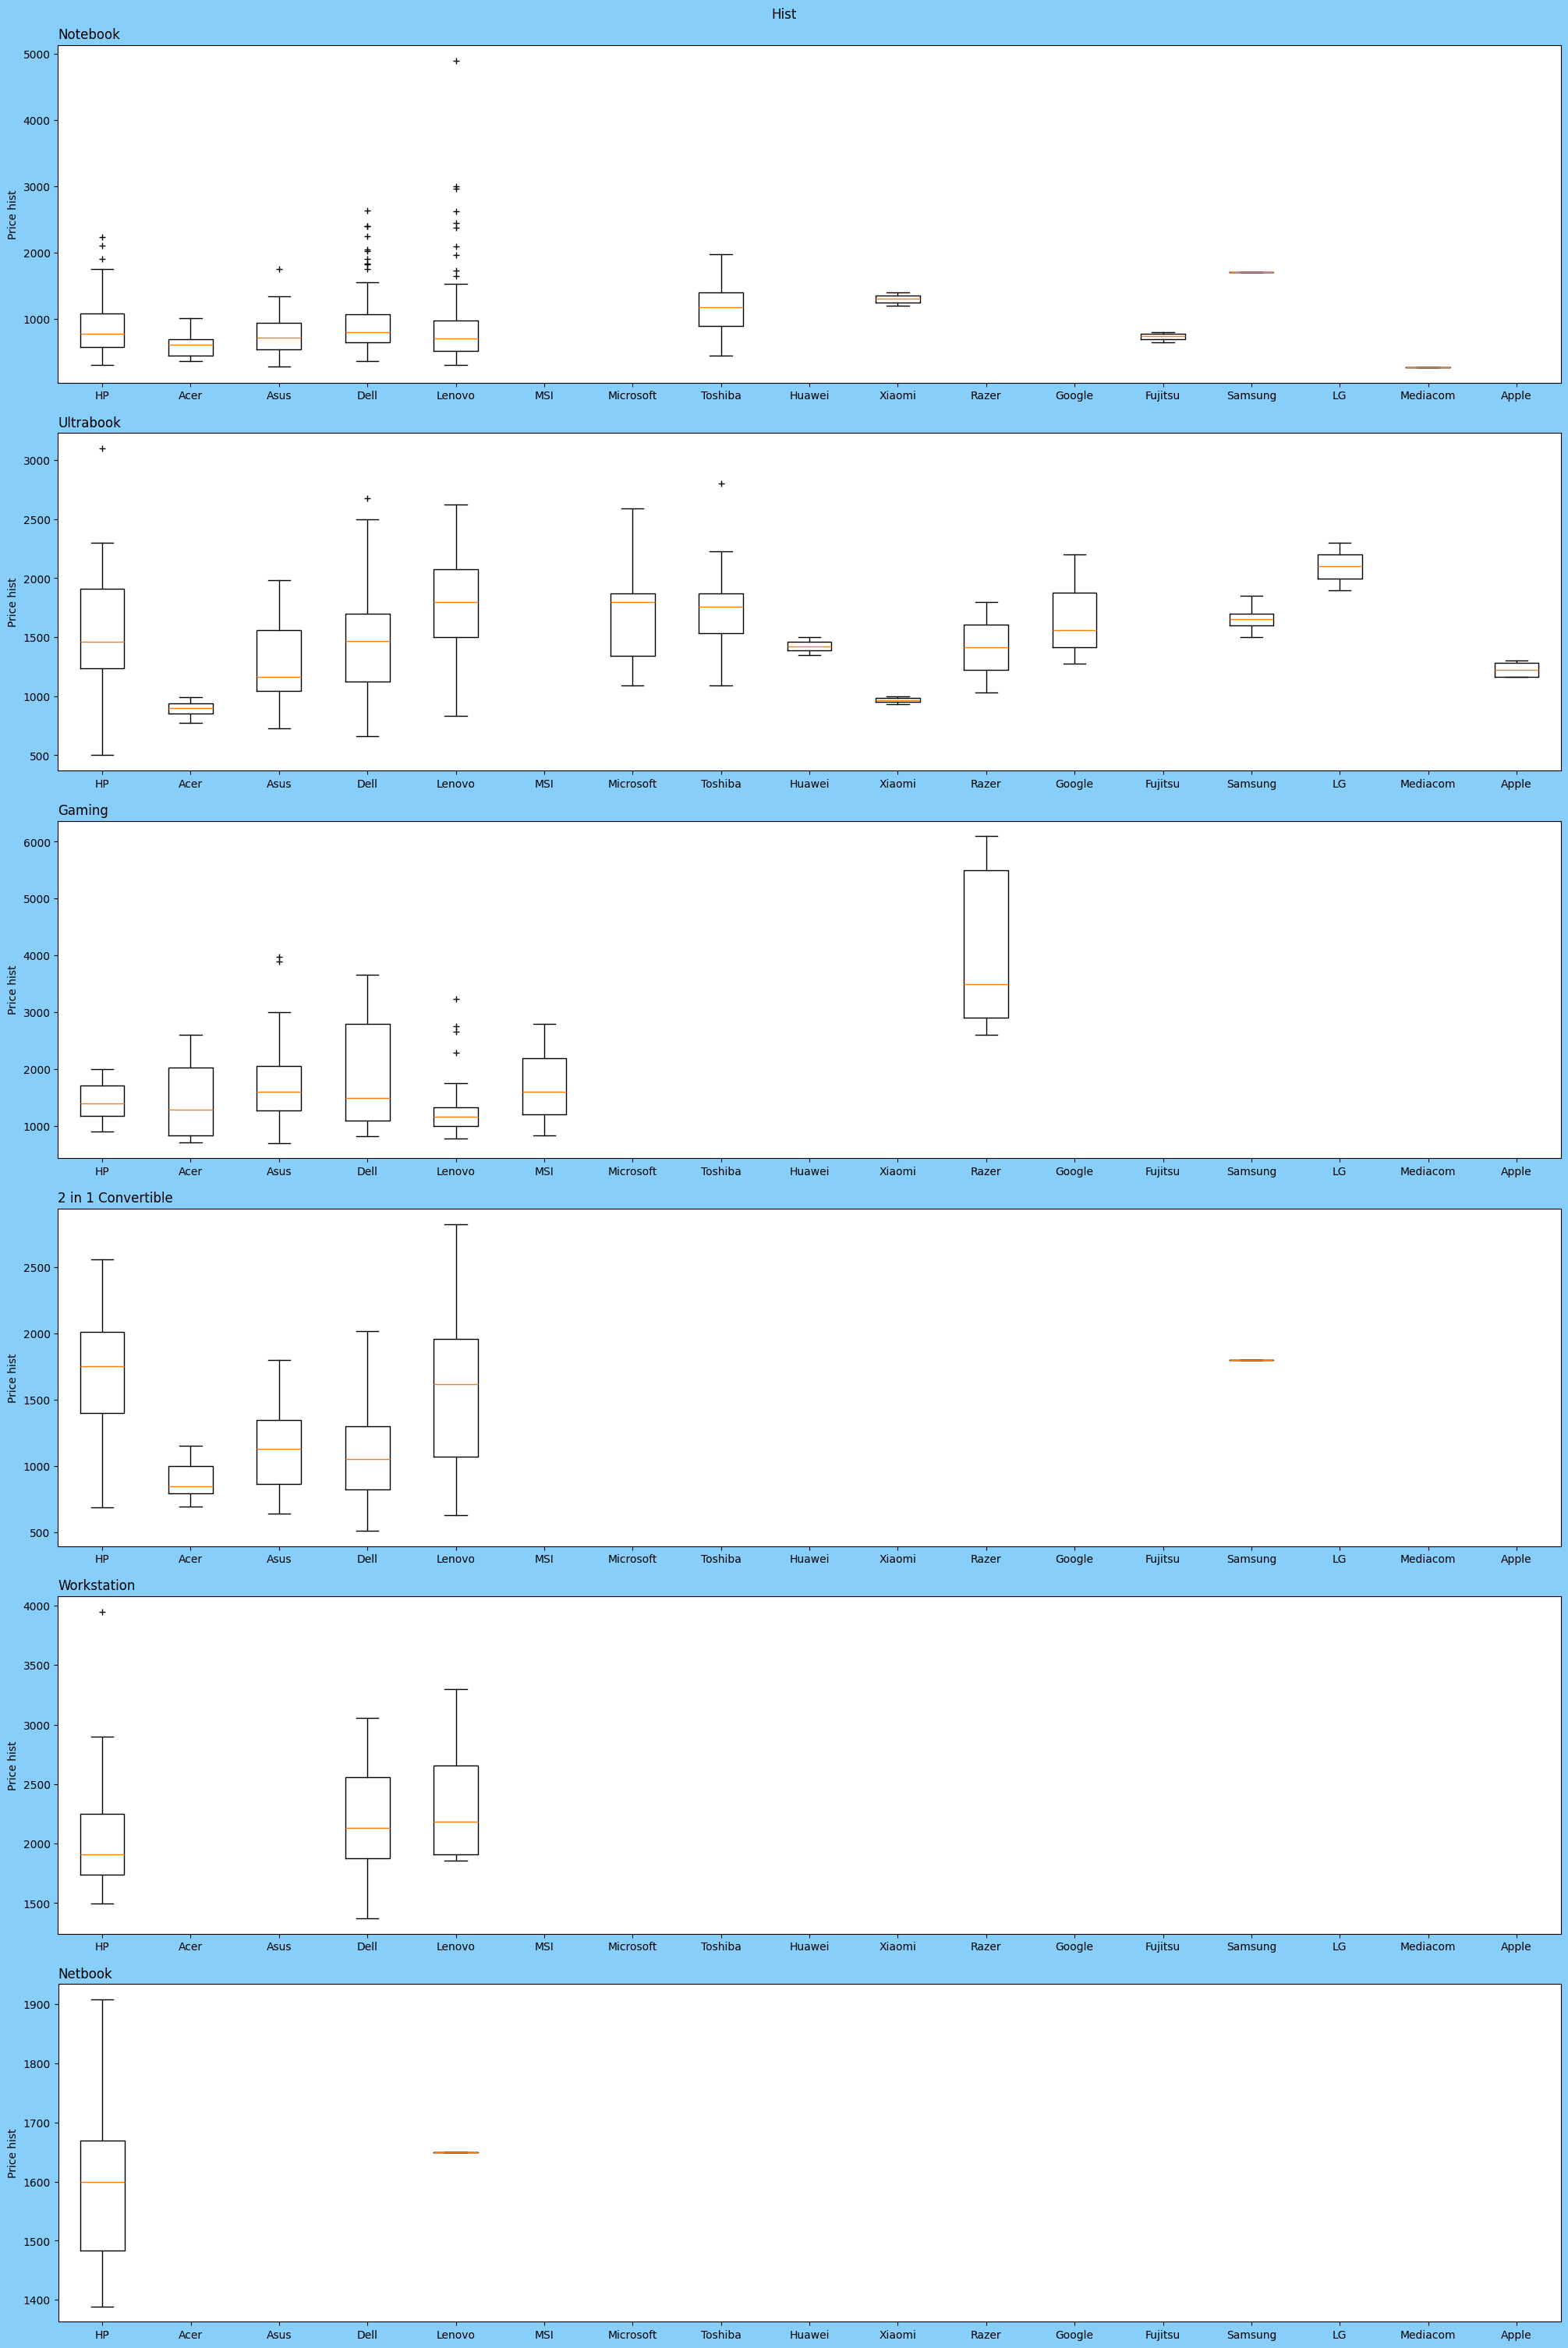

In [35]:
types = df_copy['TypeName'].unique()
companies = df_copy['Company'].unique()

fig = plt.figure(figsize=(20,30), facecolor='lightskyblue',
                 layout='constrained')
fig.suptitle('Hist')
#fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
sub_figures = fig.subfigures(len(types),1)
for type, sub_fig in zip(types, sub_figures):
    df_filtered = df_copy[df_copy['TypeName']==type]
    ax = sub_fig.add_subplot()
    ax.set_ylabel("Price hist")
    ax.set_title(type, loc='left')
    data = []
    for comp in companies:
        data.append(df_filtered[df_filtered['Company']==comp]['Price_euros'])
        #data.append(df_filtered[df_filtered['Company']==comp]['Price_euros'])
        #ax.boxplot(df_copy[(df_copy['TypeName']==type) & (df_copy['Company']==comp)]['Price_euros'])
    bp = ax.boxplot(data, notch=False, vert=True, whis=1.5)
    ax.set_xticklabels(companies)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    # groups = df_copy[df_copy['TypeName']==type].groupby('Company')['Price_euros']
    # measure = ['median', 'min','max']
    # groups = groups.agg(measure)
    
    # x = np.arange(len(groups.index.to_list()))
    # #x = np.arange(len(measure))
    # width = 0.25
    # multiplier = 0
    
    # for mes in measure:
    #     offset = width*multiplier+0.1
    #     rects = ax.bar(x+offset, groups[mes], width, label=mes)
    #     ax.bar_label(rects, padding=3)
    #     multiplier+=1
 
    # ax.set_xticks(x + width, groups.index.to_list())
    # ax.legend(loc='upper left', ncols=3)